In [65]:
conda install -c conda-forge -c pytorch u8darts-all

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dicod\anaconda3

  added / updated specs:
    - u8darts-all


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    ca-certificates-2023.5.7   |       h56e8100_0         145 KB  conda-forge
    cairo-1.16.0               |    h63a05c6_1001         5.2 MB  conda-forge
    catboost-1.2               |  py310h5588dad_4        47.1 MB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    cmdstan-2.29.2             |       hc4b6281_2        50.7 MB  conda-forge
    cmdstanpy-1.1.0            |     pyhd8ed1ab_0          64 KB  conda-forge
    conda-23.3.1               |  py310haa95532_0         983 KB
    convert


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::holoviews==1.15.4=py310haa95532_0
  - defaults/win-64::hvplot==0.8.2=py310haa95532_0
  - defaults/win-64::ipykernel==6.19.2=py310h9909e9c_0
  - defaults/win-64::ipython==8.10.0=py310haa95532_0
  - defaults/noarch::ipywidgets==7.6.5=pyhd3eb1b0_1
  - defaults/win-64::jupyter==1.0.0=py310haa95532_8
  - defaults/win-64::jupyterlab==3.5.3=py310haa95532_0
  - defaults/noarch::jupyterlab_pygments==0.1.2=py_0
  - defaults/win-64::jupyterlab_server==2.19.0=py310haa95532_0
  - defaults/win-64::jupyter_console==6.6.2=py310haa95532_0
  - defaults/win-64::jupyter_server==1.23.4=py310haa95532_0
  - defaults/win-64::nbclassic==0.5.2=py310haa95532_0
  - defaults/win-64::nbconvert==6.5.4=py310haa95532_0
  - defaults/win-64::notebook==6.5.2=py310haa95532_0
  - defaults/win-64::notebook-shim==0.2.2=py310haa95532_0
  - defaults/win-64::numpydoc==1.5.0=py310h

### Data clearning

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# darts
from darts import TimeSeries

In [4]:
csv_files = glob.glob('/Users/dicod/semester_projects_02/Data/*.csv')
df = pd.DataFrame()

for file in csv_files:
    temp_df = pd.read_csv(file)
    df = pd.concat([df, temp_df], ignore_index=True)

In [5]:
df = df[['MTU (CET/CEST)','Day-ahead Price [EUR/MWh]']]
df = df.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'Price'})

In [6]:
df.head()

,date,Price
0,01.01.2020 00:00 - 01.01.2020 01:00,33.42
1,01.01.2020 01:00 - 01.01.2020 02:00,31.77
2,01.01.2020 02:00 - 01.01.2020 03:00,31.57
3,01.01.2020 03:00 - 01.01.2020 04:00,31.28
4,01.01.2020 04:00 - 01.01.2020 05:00,30.85


In [7]:
df['date'] = df['date'].apply(lambda x: x[0:16])

In [8]:
df.head()

,date,Price
0,01.01.2020 00:00,33.42
1,01.01.2020 01:00,31.77
2,01.01.2020 02:00,31.57
3,01.01.2020 03:00,31.28
4,01.01.2020 04:00,30.85


In [9]:
df_no_duplicates = df.drop_duplicates(subset='date')

In [11]:
time_series = TimeSeries.from_dataframe(df_no_duplicates, time_col='date', value_cols = 'Price', fill_missing_dates=True, freq=None)

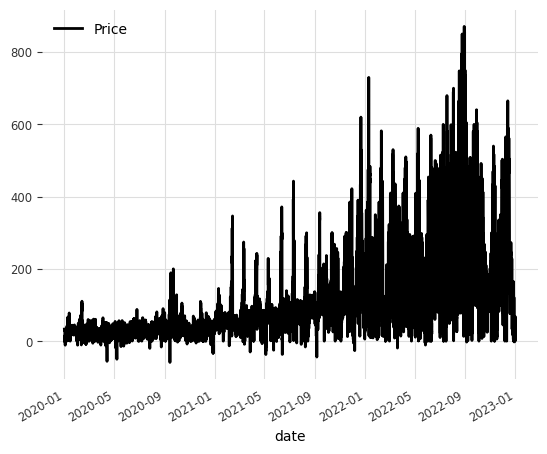

In [12]:
time_series.plot()

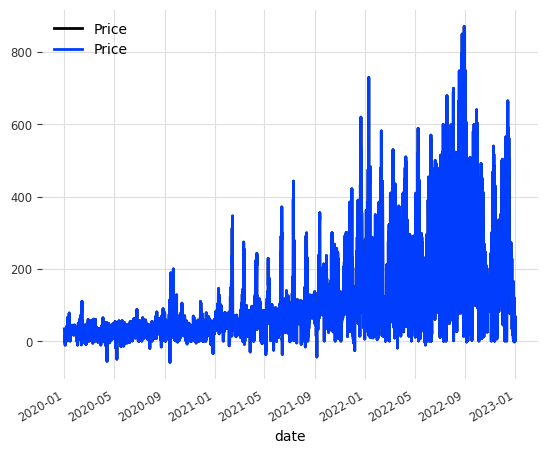

In [16]:
time_series1, time_series2 = time_series.split_before(0.75)
time_series.plot()
time_series.plot()

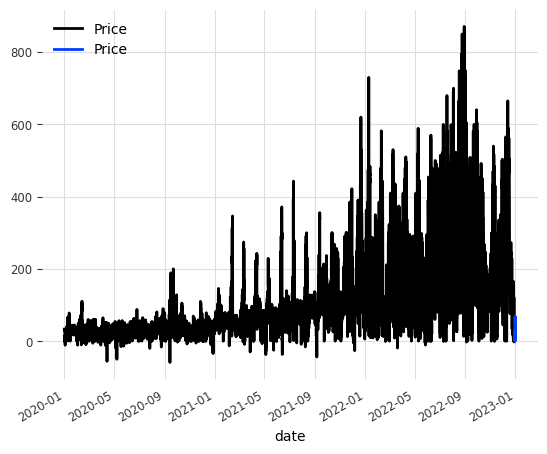

In [18]:
time_series1, time_series2 = time_series[:-36], time_series[-36:]
time_series1.plot()
time_series2.plot()

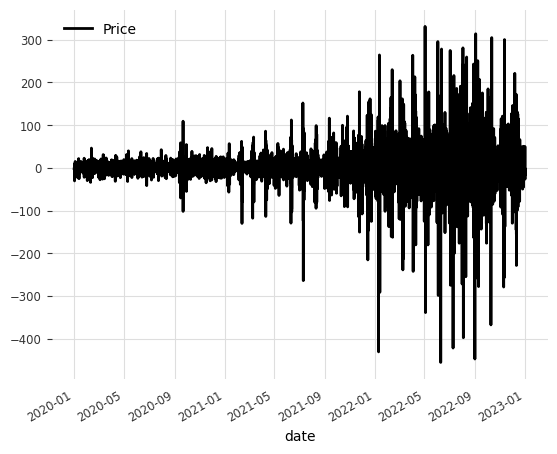

In [19]:
time_series.diff().plot()

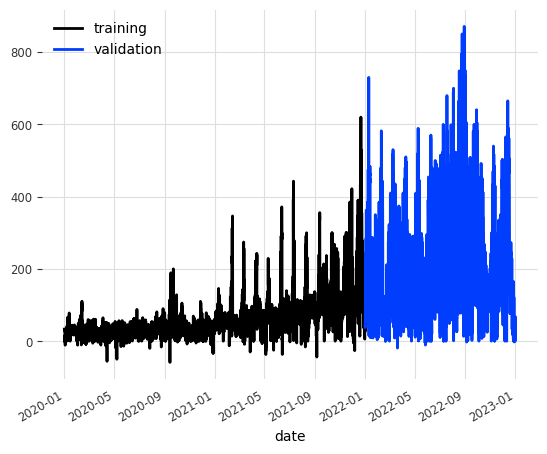

In [17]:
# dart recommendation, but I think we will use random methold.
train, val = time_series.split_before(pd.Timestamp("01.01.2022 01:00"))
train.plot(label="training")
val.plot(label="validation")

### build model